In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import scipy.stats

import european_call as ec

In [15]:
# Initialize variables for underlying. 
# We set T = 1, but write the code for general T. 
# We will write S_T for an array of S(T) samples

r = 0.05
sigma = 0.2
S_0 = 100
K = 100
T = 1

# Calculate the underlying, assuming W is a matrix of standard normals
def underlying(r, sigma, S_0, K, T, W):
    W_T = [x*math.sqrt(T) for x in W]
    S_T = [S_0*math.exp((r - sigma**2/2)*T + sigma*w) for w in W_T]
    return S_T

# Payoff function
def payoff(r, T, K, S_T):
    return [math.exp(-r*T)*max(0, s - K) for s in S_T]

In [16]:
# 3. b) Compute Y_m for 1000 different sets of 1000 independent normal random variables

Y = []
for i in range(0,1000):
    W = np.random.standard_normal(1000)
    sample = underlying(r, sigma, S_0, K, T, W)
    sample_f = payoff(r, T, K, sample)
    Y.append(np.sum(sample_f)/len(sample_f))

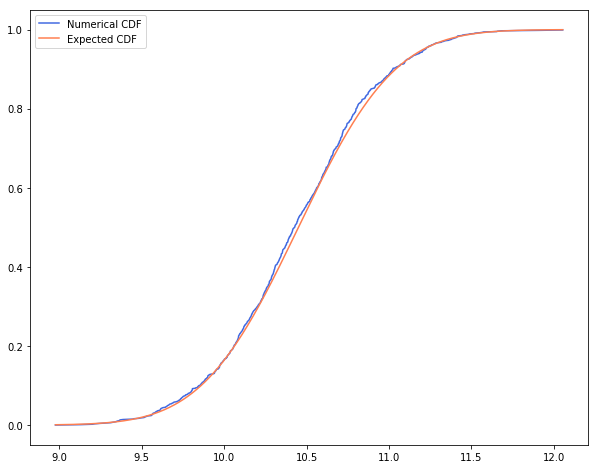

In [17]:
# 3. c) 

# Sort the Y_m into ascending order
Y_sorted = np.sort(Y)

# Plot C_m = (m-1/2)/1000 versus Y_m
# Initialize the array C = [C_m for m in range(0, 1000)]
C = [float((m-1/2))/1000.0 for m in range(0,1000)]
plt.figure(figsize = (10,8))
plt.plot(Y_sorted, C, label = 'Numerical CDF', color = 'royalblue')

# From the CLT we expect that Y_m is approximately N(mu, sqrt(var/1000)) where mu is given by the european call
# We use the variable scaled_uvar for sqrt(var/1000)

mu = ec.european_call(r, sigma, T, S_0, K, 'value')

scaled_uvar = math.sqrt(np.var(Y_sorted))
x = np.linspace(Y_sorted[0], Y_sorted[len(Y_sorted)-1], 5000)
cdf = scipy.stats.norm.cdf(x,mu,scaled_uvar)
plt.plot(x, cdf, label = 'Expected CDF', color = 'coral')
plt.legend()
plt.show()



In [18]:
# 3. d) Modify your code to use a single set of 10^6 random numbers

sample_mod = underlying(r, sigma, S_0, K, T, np.random.standard_normal(10**6))
sample_mod_f = payoff(r, T, K, sample_mod)

sum_init = sample_mod_f[0]

Y_mod = [sum_init]

for i in range(0,10**6):
    sum_init += sample_mod_f[i]
    Y_mod.append(sum_init/(i+1)) 
    
emp_var = np.var(sample_mod_f)

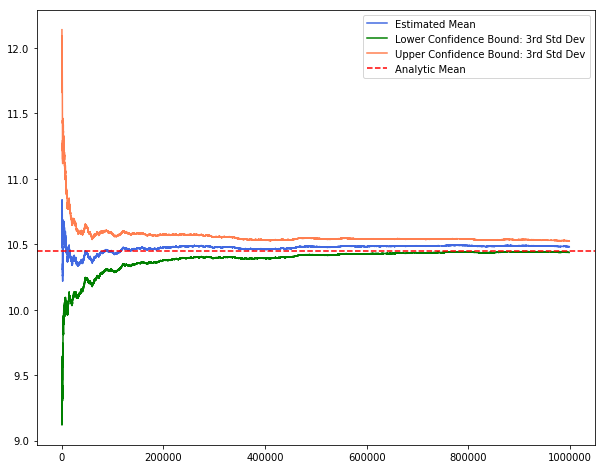

In [19]:
# Calculate the third standard deviation
lower_bd = [Y_mod[i] - 3*math.sqrt(emp_var/float(i+1)) for i in range(0,10**6)]
upper_bd = [Y_mod[i] + 3*math.sqrt(emp_var/float(i+1)) for i in range(0,10**6)]

# Superimpose all previous plots
plt.figure(figsize = (10,8))
plt.plot(Y_mod[10**3:], color = 'royalblue', label = 'Estimated Mean')
plt.plot(lower_bd[10**3:], color = 'g', label = 'Lower Confidence Bound: 3rd Std Dev')
plt.plot(upper_bd[10**3:], color = 'coral', label = 'Upper Confidence Bound: 3rd Std Dev')
plt.axhline(y=mu, color='r', linestyle='--', label = 'Analytic Mean')
plt.legend()
plt.show()